<a href="https://colab.research.google.com/github/BatuhanErTo/bs429_Intro_Pattern_Recognition/blob/master/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Dataset Link: https://archive.ics.uci.edu/dataset/304/blogfeedback

In [ ]:
# imports, dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df = pd.read_csv("blogData_train.csv")

In [ ]:
df.head()

,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0.1,377.0,3.0,...,0.0.229,1.0.1,0.0.230,0.0.231,0.0.232,0.0.233,0.0.234,0.0.235,0.0.236,1.0.2
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(52396, 281)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52396 entries, 0 to 52395
Columns: 281 entries, 40.30467 to 1.0.2
dtypes: float64(281)
memory usage: 112.3 MB


In [ ]:
df.isnull().sum()

,0
40.30467,0
53.845657,0
0.0,0
401.0,0
15.0,0
...,...
0.0.233,0
0.0.234,0
0.0.235,0
0.0.236,0


In [ ]:
df.columns

Index(['40.30467', '53.845657', '0.0', '401.0', '15.0', '15.52416', '32.44188',
       '0.0.1', '377.0', '3.0',
       ...
       '0.0.229', '1.0.1', '0.0.230', '0.0.231', '0.0.232', '0.0.233',
       '0.0.234', '0.0.235', '0.0.236', '1.0.2'],
      dtype='object', length=281)

In [ ]:
# give custom colum name since it is not defined in .csv file
feature_names = [f'feature_{i}' for i in range(1,281)] + ["target"]
df.columns = feature_names
df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_272', 'feature_273', 'feature_274', 'feature_275',
       'feature_276', 'feature_277', 'feature_278', 'feature_279',
       'feature_280', 'target'],
      dtype='object', length=281)

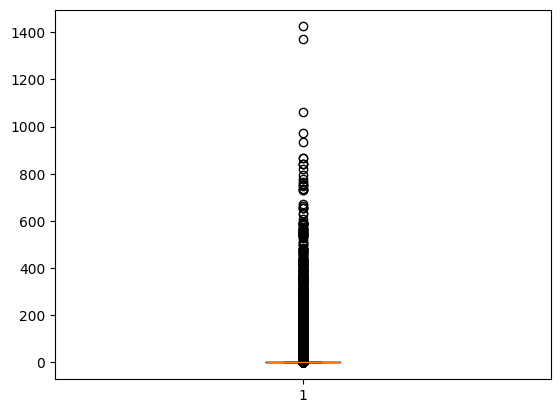

In [ ]:
# check if the data is skewed or not, unfortunately it is heavily skewed
plt.boxplot(df["target"])
plt.show()

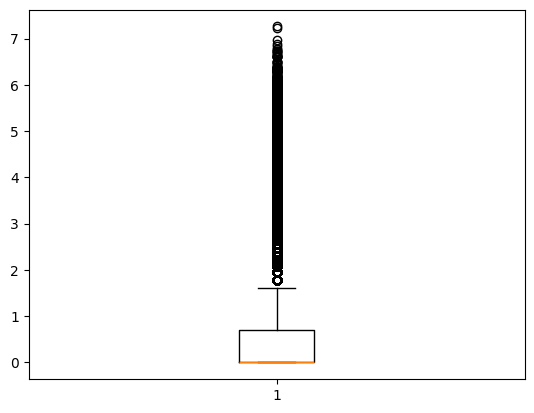

In [ ]:
# log transformation
df["target_log"] = np.log1p(df["target"])
plt.boxplot(df["target_log"])
plt.show()

In [ ]:
# feature scaling
numeric_columns = [f'feature_{i}' for i in range(1,263)] + [f'feature_{i}' for i in range(277,281)]
binary_columns = [f'feature_{i}' for i in range(263,277)]

numeric_to_be_scaled = df[numeric_columns]
binary_not_to_be_scaled = df[binary_columns]

scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_to_be_scaled)

numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numeric_columns)
scaled_df = pd.concat([numeric_scaled_df, binary_not_to_be_scaled], axis=1)
print(scaled_df.iloc[0,:])

feature_1      0.010876
feature_2      0.112878
feature_3     -0.052468
feature_4      0.138523
feature_5     -0.139109
                 ...   
feature_272    1.000000
feature_273    0.000000
feature_274    0.000000
feature_275    0.000000
feature_276    0.000000
Name: 0, Length: 280, dtype: float64


In [ ]:
# low variance filtering
numeric_columns = [f'feature_{i}' for i in range(1, 263)] + [f'feature_{i}' for i in range(277, 281)]
binary_columns = [f'feature_{i}' for i in range(263, 277)]

numeric_to_be_filtered = df[numeric_columns]
binary_not_to_be_filtered = df[binary_columns]

selector = VarianceThreshold(threshold=0.001)
numeric_filtered = selector.fit_transform(numeric_to_be_filtered)

prepared_data = np.concatenate([numeric_filtered, binary_not_to_be_filtered.values], axis=1)

In [ ]:
x = prepared_data
y = df["target_log"].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
# performance measures
mae = mean_absolute_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)
print(f"mae: {mae}")
print(f"r2s: {r2s}")

mae: 0.48457597643846967
r2s: 0.5055174934863209
